# Description

This notebook is intended to check your knowledge about data preprocessing and visualization. It is based on **adult census** dataset (available here: https://archive.ics.uci.edu/ml/datasets/adult).


## Your task

Your task will be to fill parts of the notebook marked as 

> ...

with your code. Sometimes you need to write everything yourself, sometimes just fill the blanks :)

## Dataset description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

 Prediction task is to determine **whether a person makes over 50K a year.**

Attributes:

**earnigs**: >50K, <=50K - yearly income of a given person. **PREDICTION ATTRIBUTE**

**age**: continuous

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

**fnlwgt**: continuous,

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

**education-num**: continuous

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

**sex**: Female, Male

**capital-gain**: continuous

**capital-loss**: continuous

**hours-per-week**: continuous

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

# Library imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
%matplotlib inline

# Reading data

Read data from csv file

In [7]:
data = ...
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Display basic information about dataset:
* summary (min/max/std/count) for each numerical column
* general information about data types

In [10]:
data. ...

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data. ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
earnings          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Grouping and counting earnings - prediction class

Show table and chart, presenting proportions of prediction class (earnings) in a dataset

In [12]:
data. ...

 <=50K    24720
 >50K      7841
Name: earnings, dtype: int64

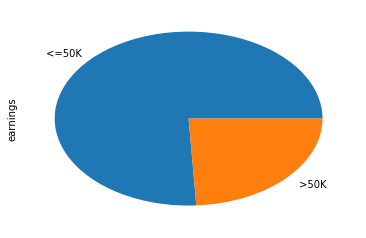

In [15]:
data. ...

Display boxplot presenting difference in age between two groups of earnings

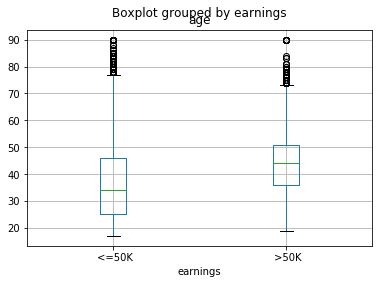

In [16]:
data.boxplot ...

Display table and chart, showing number of males to feamales in both earnig groups

In [28]:
data. ...

sex      earnings
 Female   <=50K       9592
          >50K        1179
 Male     <=50K      15128
          >50K        6662
dtype: int64

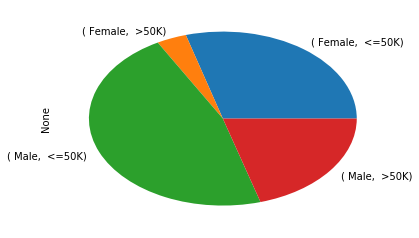

In [32]:
data. ...

Display scatter plot showing number of hours per week, grouped by earnings

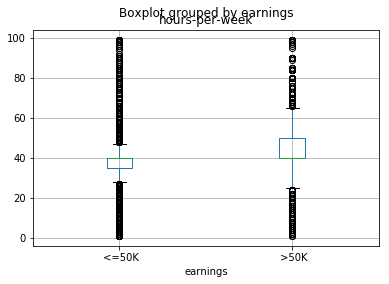

In [36]:
data. ...

Display table and chart presenting relationship between years of education and grouped earnings

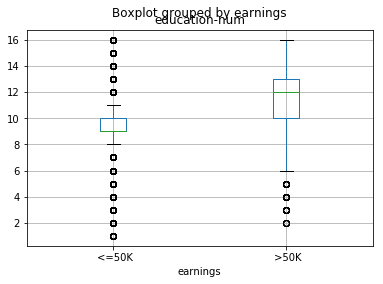

In [53]:
data. ...

Show table  presenting distribution of earnigs in particular work-class

In [64]:
data. ...

workclass          earnings
 ?                  <=50K       1645
                    >50K         191
 Federal-gov        <=50K        589
                    >50K         371
 Local-gov          <=50K       1476
                    >50K         617
 Never-worked       <=50K          7
 Private            <=50K      17733
                    >50K        4963
 Self-emp-inc       <=50K        494
                    >50K         622
 Self-emp-not-inc   <=50K       1817
                    >50K         724
 State-gov          <=50K        945
                    >50K         353
 Without-pay        <=50K         14
dtype: int64

Do the same with **normalized values** divide proportion in each group by the group total. This might be a tricky one =)

Tip:
 * calculate numerator (group by workclass and earnigs summed) and denominator (grouped and summarized only by workclass) separately
 
 * then proceed as you would with pen & paper :)

In [74]:
numerator = data. ...
denominator = data. ...

...

workclass          earnings
 ?                  <=50K      0.895969
                    >50K       0.104031
 Federal-gov        <=50K      0.613542
                    >50K       0.386458
 Local-gov          <=50K      0.705208
                    >50K       0.294792
 Never-worked       <=50K      1.000000
 Private            <=50K      0.781327
                    >50K       0.218673
 Self-emp-inc       <=50K      0.442652
                    >50K       0.557348
 Self-emp-not-inc   <=50K      0.715073
                    >50K       0.284927
 State-gov          <=50K      0.728043
                    >50K       0.271957
 Without-pay        <=50K      1.000000
dtype: float64

# Univariate distribution

Show histogram of age distribution in a dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDE73A2E10>]], dtype=object)

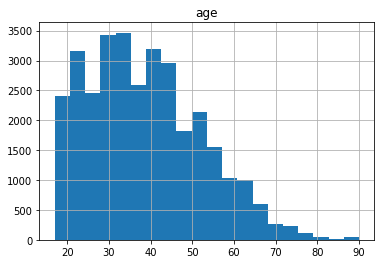

In [58]:
data. ...

Show histogram of capital-gain distribution in a dataset. Set proper number of bins, to make plot readable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDF0236438>]], dtype=object)

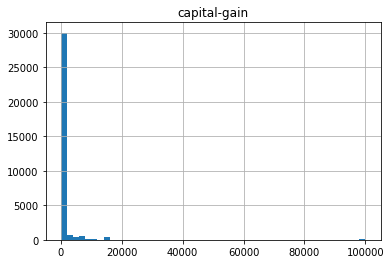

In [63]:
data. ...

Show distrinution of hours-per-week in a dataset

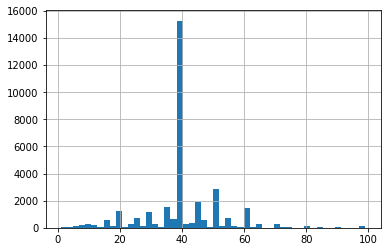

In [78]:
data. ...